# Evaluación - Redes Convolucionales

**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.1

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Introducción

Se seleccionó TensorFlow/Keras para la implementación de la CNN debido a su facilidad de uso, documentación amplia y gran comunidad, lo que facilita el desarrollo y depuración de modelos. Adicionalmente, TensorFlow ofrece alto rendimiento en cálculos numéricos intensivos mediante el uso eficiente de GPUs, además de un soporte robusto para la implementación de diversas arquitecturas CNN complejas.

# Librerías

In [ ]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections
import pprint
import os
import glob
import absl.logging


# Librerías para procesamiento y visualización de imágenes
import cv2
from google.colab.patches import cv2_imshow

# TensorFlow y Keras (CNN)
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model
from tensorflow.keras.layers import (
    Input, Dense, Activation, Dropout, Flatten, BatchNormalization,
    Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom
)
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.utils import to_categorical
from IPython.display import display

# Librerías de Scikit-learn para métricas y división de datos
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

# Configuración gráfica para matplotlib en Colab
%matplotlib inline
import matplotlib.patheffects as path_effects

# Descarga de la data

* `!wget`: utilidad de línea de comandos para descargar archivos desde una URL.

* `-O simpsons_train.tar.gz`: fuerza a guardar el archivo descargado con ese nombre en el disco local.

La URL de Dropbox es el enlace compartido que contiene el tarball con todas las imágenes del conjunto de entrenamiento de Simpsons.

In [ ]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-18 04:51:46--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8c35cd2051e40dd0a93dcd244b.dl.dropboxusercontent.com/cd/0/inline/Cp7rOIK4OwwBDP3PljJLj11LxANvsUTNo8SDNfd_C0LOE66U2mtgZeLydG-cUWq9DaR3kz_yYm7-qQIAkcKVbpCtJ3a2pExeq38F2-0ojAWpk_r0aVNRNArXBNbPcyKaBITFfE6uiX0x5yqnkf5sCN4g/file# [following]
--2025-05-18 04:51:47--  https://uc8c35cd2051e40dd0a93dcd244b.dl.dropboxusercontent.com/cd/0/inline/Cp7rOIK4OwwBDP3PljJLj11LxANvsUTNo8SDNfd_C0LOE66U2mtgZeLydG-cUWq9DaR3kz_yYm7-qQIAkcKVbpCtJ3a2pExeq38F2-0ojAWpk_r0aVNRNArXBNbPcyKaBITFfE6uiX0x5yqnkf5sCN4g/file
Resolving uc8c35cd2051e40dd0a93dcd244b.dl.dropboxusercontent.com (uc8c35cd2051e40dd0a93dcd244b.dl.dropboxusercontent.com)... 162.125.

Similar al paso anterior, pero apuntando al archivo que contiene las imágenes de test.

In [ ]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-18 04:52:08--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4ded635d53c063e66f51ceb604.dl.dropboxusercontent.com/cd/0/inline/Cp5bqYL6__oHNTsvWkORz4QCG-oTzo5B0clgjr-NIlyZjr4qaURJBcFKFkqIzs5q9-cSv4xZlkGl0cepHi2LS7hWigIoZbZnHQ5SlZyyRFPJJnE4NilityrsukVQ0B7UOeUubB8vgZ5q6BUAT09ybw0B/file# [following]
--2025-05-18 04:52:09--  https://uc4ded635d53c063e66f51ceb604.dl.dropboxusercontent.com/cd/0/inline/Cp5bqYL6__oHNTsvWkORz4QCG-oTzo5B0clgjr-NIlyZjr4qaURJBcFKFkqIzs5q9-cSv4xZlkGl0cepHi2LS7hWigIoZbZnHQ5SlZyyRFPJJnE4NilityrsukVQ0B7UOeUubB8vgZ5q6BUAT09ybw0B/file
Resolving uc4ded635d53c063e66f51ceb604.dl.dropboxusercontent.com (uc4ded635d53c063e66f51ceb604.dl.dropboxusercontent.com)... 162.125.6.1

* `tar`: comando para trabajar con archivos tar (archivos empaquetados).

* Flags utilizados:

  * `-x` → extraer.

  * `-z` → descomprimir gzip.

  * `-v` → modo verboso (muestra en pantalla cada fichero que va extrayendo).

  * `-f` → indica el nombre del archivo tar a procesar.

Tras ejecutarlo, se crea una carpeta (llamada `simpsons/`) con todas las subcarpetas o imágenes descomprimidas.

In [ ]:
!tar -xzvf simpsons_train.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/pic_00

Igual que en el paso anterior, pero se extrae el tarball de test, generando la carpeta `simpsons_testset/`.

In [ ]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

# Carga y preprocesamiento de datos


Las dos funciones presentadas sirven para leer, redimensionar y etiquetar las imágenes del proyecto antes de alimentar la red neuronal. A continuación se detalla su comportamiento en cuatro apartados comunes:


Propósito general:

  * `load_train_set`: carga el conjunto de entrenamiento desde carpetas organizadas por personaje.
  * `load_test_set`: carga el conjunto de prueba desde un directorio con imágenes sueltas, inferiendo la etiqueta a partir del nombre de archivo.

Proceso:

* Se crean dos listas vacías (una para imágenes y otra para etiquetas).

* Recorrido de archivos:
  * En `load_train_set` se itera sobre cada par `(etiqueta, personaje)` de `map_characters` y se listan los ficheros de imagen dentro de la carpeta correspondiente.
  * En `load_test_set` se recorre todo el directorio con un patrón genérico (`glob`) y se extrae el nombre del personaje de cada nombre de archivo, buscando el prefijo antes del último guion bajo.
* Lectura y redimensionado:
  * Cada imagen se lee con OpenCV (`cv2.imread`) y se aplica `cv2.resize` para ajustar la imagen a (`IMG_SIZE, IMG_SIZE`) usando interpolación adecuada.

* Etiquetado
  * En entrenamiento la etiqueta viene directamente de la clave del diccionario y en prueba: se invierte el diccionario para mapear el nombre de personaje extraído al índice numérico.

Al finalizar el bucle, las listas de imágenes y etiquetas se convierten a `np.ndarray` con el tipo de dato apropiado (`float32` para imágenes, `int32` para etiquetas).



In [ ]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

Es un diccionario que asocia cada etiqueta numérica (clave) con el nombre del personaje (valor) correspondiente.

`IMG_SIZE` Define el tamaño fijo (en píxeles) al que se redimensionarán todas las imágenes antes de pasarlas a la red neuronal. En este caso, `IMG_SIZE = 64` implica que cada imagen se transformará a un cuadrado de 64 × 64 píxeles.

In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

Se asignan las carpetas `"simpsons"` (entrenamiento) y `"simpsons_testset"` (prueba) a las variables `DATASET_TRAIN_PATH_COLAB` y `DATASET_TEST_PATH_COLAB` respectivamente, y a continuación se llaman las funciones `load_train_set` y `load_test_set` con estas rutas y el diccionario `MAP_CHARACTERS` para cargar en memoria los arrays `X, y` (imágenes y etiquetas de entrenamiento) y `X_test, y_test` (imágenes y etiquetas de prueba).

In [ ]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


Se genera un array `perm` con una permutación aleatoria de los índices de `X`, y a continuación se reordenan simultáneamente `X` e `y` usando esa permutación, de modo que las imágenes y sus etiquetas queden barajadas aleatoriamente antes de cualquier partición o entrenamiento.

In [ ]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

Se utiliza `train_test_split` para reservar el 20 % de las muestras originales `X, y` como conjunto de validación (`X_val`, `y_val`), mientras que el 80 % restante conforma `X_train, y_train`. A continuación, se extraen los tamaños de cada partición (`X_train_num_elem`, `X_val_num_elem`, `X_test_num_elem`) y se definen variables que describen la resolución (`img_rows`, `img_cols`), el número de canales (`img_channels`) y la cantidad de clases (`num_categ`).

Finalmente, se imprimen en consola tanto el número de imágenes y etiquetas en cada subconjunto como sus dimensiones (número de muestras y forma de cada array), de modo que podamos verificar de un vistazo que la división y los parámetros son los esperados antes de continuar con la normalización y el entrenamiento del modelo.

In [ ]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  18992
Número de imágenes de training (80% de anterior train) :  15193
Número de imágenes de validación (20% de anterior train) :  3799
Número de imágenes de test :  890
Número de resultados de anterior training :  18992
Número de resultados de training (80% de anterior train) :  15193
Número de resultadoss de validación (20% de anterior train) :  3799
Número de resultados de test :  890
Dimensiones de training :  (15193, 64, 64, 3)
Dimensiones de validation :  (3799, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


# Definición de modelos


El proceso de construcción de los modelos CNN sigue un enfoque incremental:

* Se redimensionarán las imágenes a un formato homogéneo, normalizándose para mejorar la convergencia durante el entrenamiento.

* Se trabajará con una arquitectura base de capas convolucionales (`Conv2D`) y capas de reducción dimensional (`MaxPooling2D`), complementadas con capas de regularización (`Dropout`) y una capa de clasificación (`Dense`) con activación `softmax`.

* Para finalmente evaluar múltiples configuraciones variando número de capas, hiperparámetros (tamaño del kernel, tasa de Dropout, epochs) y se monitorearon métricas clave (accuracy, loss) para seleccionar la configuración más eficiente y efectiva.

## Premodelado

El paso de normalización y codificación es la base sobre la cual se construye todo el entrenamiento: sin él, las capas convolucionales y densas no aprenderían de manera eficiente ni interpretable.

1. Escalado a [0,1]: Dividir los valores de píxel por 255.0 garantiza que todas las características de entrada queden en el rango [0,1] permitiendo así acelerar la convergencia del optimizador, al evitar gradientes grandes y mejorando la estabilidad numérica durante el cálculo de activaciones y gradientes.

2. Tipo `float32`: Convertir a `float32` equilibra precisión y memoria, y es el formato nativo de TensorFlow.

3. One-hot encoding: Transformar las etiquetas enteras en vectores de dimensión `num_categ` permite usar la función de pérdida categorical_crossentropy y calcular métricas por clase de forma directa.

In [ ]:
# Normalización
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_categ)
y_val = tf.keras.utils.to_categorical(y_val, num_categ)
y_test = tf.keras.utils.to_categorical(y_test, num_categ)

Además se utilizó la técnica de Data Augmentation (el cual simula variaciones reales en las imágenes como orientación, escala, rotación) para reducir el sobreajuste al exponer al modelo a ejemplos más diversos y mejorar la capacidad de generalización ante nuevas imágenes de test esto es debido a que en analisis anteriores se puede apreciar una evidente brecha de cantidad entre las clases de las imágenes.

Los componentes del Data Augmentation son:

* `RandomFlip('horizontal')`: Captura simetrías laterales (personajes volteados).
* `RandomRotation(0.1`): Permite ligeras rotaciones hasta ±10 %, simulando ángulos diferentes.
* `RandomZoom(0.1)`: Añade zoom aleatorio de ±10 %, variando la escala de los rostros

Además se inserta Sequential como la primera capa en cada modelo CNN, de modo que todas las imágenes de entrenamiento pasen por estas transformaciones “en tiempo real” durante el fit(), sin necesidad de generar y almacenar copias adicionales.

In [ ]:
# Definición de Data Augmentation
data_augmentation = Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
    RandomZoom(0.1),
], name='data_augmentation')

El callback EarlyStopping detiene automáticamente el proceso de entrenamiento en el momento en que la precisión sobre el conjunto de validación deja de mejorar, lo que ayuda a prevenir el sobreajuste al evitar que la red continúe ajustándose al ruido del conjunto de entrenamiento.

Al establecer un `patience` de 15 épocas, concedemos un margen razonable para pequeñas variaciones antes de interrumpir el fit, y con la opción `restore_best_weights=True` garantizamos que, al finalizar, el modelo quede configurado con los pesos que lograron el mejor desempeño en validación. De este modo, optimizamos tanto la generalización del modelo como el tiempo de cómputo invertido.

In [ ]:
# Definición EarlyStopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

## Modelo 1

El modelo1 se construyó como un punto de partida experimental, con el objetivo de establecer una línea base clara antes de explorar arquitecturas más profundas. Se definió como un Sequential de Keras que incorpora:

1. Una capa de entrada con la forma de las imágenes (`img_rows×img_cols×img_channels`) seguida de nuestro bloque de data augmentation, para exponer al modelo desde el inicio a pequeñas variaciones (flip, rotación y zoom).

2. Tres bloques convolucionales progresivos, de 32, 64 y 128 filtros (kernel 3×3, `activation='relu'`, `padding=“same”`), cada uno seguido de `BatchNormalization` para estabilizar las activaciones y de `MaxPooling2D` de 2×2 para reducir la dimensionalidad espacial.

3. Una capa de `Dropout(0.3)` antes del clasificador, con el fin de introducir regularización temprana y evitar sobreajuste en este modelo inicial.

4. Finalmente, un `Flatten` que aplana las características extraídas y una capa densa oculta de 256 unidades (`ReLU`) antes de la capa de salida softmax de `num_categ` clases.


La decisión de usar exactamente tres bloques convolucionales con BatchNorm, pooling  obedece a una elección arbitraria pero fundamentada en prácticas comunes de CNNs iniciales: se quiere verificar que, con un nivel moderado de profundidad, el modelo ya sea capaz de aprender patrones de bajo y medio nivel, mientras el Dropout combate el sobreajuste sin penalizar excesivamente la capacidad de representación. Este diseño nos servirá como referencia para medir mejoras al añadir más capas o técnicas de regularización más agresivas.

In [ ]:
# Modelo CNN
modelo1 = tf.keras.models.Sequential(name="modelo1")

# Input
modelo1.add(layers.Input(shape=(img_rows, img_cols, img_channels), name="entrada"))

# Augmentation
modelo1.add(data_augmentation)

# Bloque convolucional 1
modelo1.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', name="convolucion_1"))
modelo1.add(layers.BatchNormalization(name="batch_1"))
modelo1.add(layers.MaxPooling2D((2,2), name="pooling_1"))

# Bloque convolucional 2
modelo1.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', name="convolucion_2"))
modelo1.add(layers.BatchNormalization(name="batch_2"))
modelo1.add(layers.MaxPooling2D((2,2), name="pooling_2"))

# Bloque convolucional 3
modelo1.add(layers.Conv2D(128, (3,3), activation='relu', padding='same', name="convolucion_3"))
modelo1.add(layers.BatchNormalization(name="batch_3"))
modelo1.add(layers.MaxPooling2D((2,2), name="pooling_3"))

# Regularización y clasificación
modelo1.add(layers.Dropout(0.3, name="dropout"))
modelo1.add(layers.Flatten(name="flatten"))
modelo1.add(layers.Dense(256, activation='relu', name="densa_oculta"))
modelo1.add(layers.Dense(num_categ, activation='softmax', name="salida"))

In [ ]:
modelo1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

modelo1.summary()

Model: "modelo1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_1 (BatchNormalization)    │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_2 (BatchNormalization)    │ (None, 32, 32, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_3 (BatchNormalization)    │ (None, 16, 16, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densa_oculta (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,196,178 (8.38 MB)

 Trainable params: 2,195,730 (8.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history_modelo1 = modelo1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop])

Epoch 1/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.3320 - loss: 2.5423 - val_accuracy: 0.4454 - val_loss: 1.9130
Epoch 2/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5972 - loss: 1.3406 - val_accuracy: 0.5515 - val_loss: 1.5878
Epoch 3/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6809 - loss: 1.0329 - val_accuracy: 0.6152 - val_loss: 1.4577
Epoch 4/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7554 - loss: 0.7860 - val_accuracy: 0.7123 - val_loss: 0.9949
Epoch 5/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8040 - loss: 0.6608 - val_accuracy: 0.7639 - val_loss: 0.8012
Epoch 6/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8317 - loss: 0.5493 - val_accuracy: 0.7165 - val_loss: 1.1130
Epoch 7/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8497 - loss: 0.5106 - val_accuracy: 0.7744 - val_loss: 0.7961
Epoch 8/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8584 - loss: 0.4757 - val_

Al finalizar el entrenamiento se ejecutó el `classification_report` para evaluar las métricas clave en validación

In [ ]:
y_pred_modelo1 = modelo1.predict(X_test).argmax(axis=1)

y_true_modelo1 = y_test.argmax(axis=1)

print(classification_report(y_true_modelo1, y_pred_modelo1, target_names=MAP_CHARACTERS.values()))

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.98      0.90      0.93        48
  apu_nahasapeemapetilon       1.00      0.96      0.98        50
            bart_simpson       0.96      0.88      0.92        50
charles_montgomery_burns       0.95      0.83      0.89        48
            chief_wiggum       0.96      0.98      0.97        50
          comic_book_guy       1.00      0.90      0.95        49
          edna_krabappel       0.92      0.90      0.91        50
           homer_simpson       0.83      1.00      0.91        50
           kent_brockman       0.92      0.94      0.93        50
        krusty_the_clown       1.00      0.98      0.99        50
            lisa_simpson       0.78      0.94      0.85        50
           marge_simpson       0.94      1.00      0.97        50
     milhouse_van_houten       0.98      0.96      0.97        49
             moe_szyslak       0.94

El `modelo1` ha escalado su rendimiento de manera notable al pasar del conjunto de validación al conjunto de prueba, alcanzando una accuracy de 95 % y un F1-socre 95% en 890 imágenes. Este salto confirma que, pese a su carácter “base”, la combinación de tres bloques convolucionales, BatchNormalization y Dropout(0.3) ya proporciona una capacidad de generalización muy sólida.

No obstante, al desglosar las métricas de precision/recall por clase, emergen matices a considerar, tales como:

* Que clases como `apu_nahasapeemapetilon`, `krusty_the_clown` y `principal_skinner` muestran recall de 1.00 y precision ≥ 0.94, lo que indica que el modelo no sólo identifica correctamente todos los ejemplos de estos personajes, sino que también minimiza los falsos positivos en su contra. Además, `comic_book_guy` y `edna_krabappel` alcanzan F1-scores de 0.97 y 0.98 respectivamente, evidenciando que sus rasgos distintivos quedaron bien captados.

* En contraparte clases con recall más bajo `lisa_simpson` (0.82) y `charles_montgomery_burns` (0.85) presentan un número considerable de falsos negativos, probablemente por variaciones de iluminación o poses que no vio el modelo durante el entrenamiento. También, las clases con precisión más baja Abraham Grampa Simpson (0.87) y Homer Simpson (0.86) sufren de falsos positivos.

Al analizar las curvas de entrenamiento, se observa que el accuracy sobre el conjunto de entrenamiento alcanzó el 94% en la mejor época mientras que la val_accuracy se estabilizó alrededor del 88%, revelando una brecha que delata cierto sobreajuste, indicando así que el modelo memoriza patrones específicos del set de entrenamiento en lugar de aprender representaciones completamente generalizables. Para reducir esta discrepancia y mejorar la capacidad de generalización, la siguiente iteración del modelo incorpora un bloque convolucional adicional, pasando de 3 a 4 bloques y manteniendo el uso de BatchNormalization y Dropout, pero distribuirlos de forma que cada bloque nuevo refuerce la regularización sin incrementar excesivamente la complejidad.


## Modelo 2

La arquitectura del modelo2 introduce un cuarto bloque convolucional y esperando que se logre profundizar la extracción de características y mitigar el sobreajuste observado en el modelo de referencia.

Al igual que en el modelo anterior se comienza con la misma capa de entrada y bloque de augmentations, seguido de cuatro bloques Convolución + BatchNorm+ MaxPool (32,64, 128, 256 filtros, kernels 3×3). Tras extraer jerarquías de características de bajo a alto nivel, aplicamos Dropout(0.3), aplanamos la salida y finalizamos con una capa densa de 256 unidades y softmax de num_categ clases.

Se espera que al añadir un bloque extra (256 filtros), el modelo se vuelva capaz de aprender patrones más complejos y de mayor abstracción, reforzando su capacidad de discriminación entre clases similares.

Se mantiene BatchNormalization y Dropout como mecanismos comprobados de estabilización y regularización, respectivamente, y el optimizador Adam por su rápido ajuste adaptativo.

### Modelo 2a

In [ ]:
# Modelo CNN
modelo2 = tf.keras.models.Sequential(name="modelo2")

# Input
modelo2.add(layers.Input(shape=(img_rows, img_cols, img_channels), name="entrada"))

# Augmentation
modelo2.add(data_augmentation)

# Bloque convolucional 1
modelo2.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', name="convolucion_1"))
modelo2.add(layers.BatchNormalization(name="batch_1"))
modelo2.add(layers.MaxPooling2D((2,2), name="pooling_1"))

# Bloque convolucional 2
modelo2.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', name="convolucion_2"))
modelo2.add(layers.BatchNormalization(name="batch_2"))
modelo2.add(layers.MaxPooling2D((2,2), name="pooling_2"))

# Bloque convolucional 3
modelo2.add(layers.Conv2D(128, (3,3), activation='relu', padding='same', name="convolucion_3"))
modelo2.add(layers.BatchNormalization(name="batch_3"))
modelo2.add(layers.MaxPooling2D((2,2), name="pooling_3"))

# Bloque convolucional 4
modelo2.add(Conv2D(256, (3,3), activation='relu',padding='same',name="convolucion_4"))
modelo2.add(BatchNormalization(name="batch_4"))
modelo2.add(MaxPooling2D((2,2),name="pooling_4"))


# Regularización y clasificación
modelo2.add(layers.Dropout(0.3, name="dropout"))
modelo2.add(layers.Flatten(name="flatten"))
modelo2.add(layers.Dense(256, activation='relu', name="oculta1"))
modelo2.add(layers.Dense(num_categ, activation='softmax', name="salida"))

In [ ]:
modelo2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo2.summary()

Model: "modelo2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_1 (BatchNormalization)    │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_2 (BatchNormalization)    │ (None, 32, 32, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_3 (BatchNormalization)    │ (None, 16, 16, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_4 (Conv2D)          │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_4 (BatchNormalization)    │ (None, 8, 8, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_4 (MaxPooling2D)        │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oculta1 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,443,794 (5.51 MB)

 Trainable params: 1,442,834 (5.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history_modelo2 = modelo2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop])

Epoch 1/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.3435 - loss: 2.4200 - val_accuracy: 0.5109 - val_loss: 1.6480
Epoch 2/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6375 - loss: 1.2054 - val_accuracy: 0.6997 - val_loss: 0.9556
Epoch 3/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7454 - loss: 0.8189 - val_accuracy: 0.7257 - val_loss: 0.9130
Epoch 4/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8073 - loss: 0.6284 - val_accuracy: 0.6718 - val_loss: 1.1299
Epoch 5/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8367 - loss: 0.5361 - val_accuracy: 0.7928 - val_loss: 0.7369
Epoch 6/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8560 - loss: 0.4888 - val_accuracy: 0.8210 - val_loss: 0.6610
Epoch 7/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8678 - loss: 0.4369 - val_accuracy: 0.8494 - val_loss: 0.5465
Epoch 8/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8855 - loss: 0.3738 - va

In [ ]:
y_pred_modelo2 = modelo2.predict(X_test).argmax(axis=1)

y_true_modelo2 = y_test.argmax(axis=1)

print(classification_report(y_true_modelo2, y_pred_modelo2, target_names=MAP_CHARACTERS.values()))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.98      0.94      0.96        48
  apu_nahasapeemapetilon       1.00      1.00      1.00        50
            bart_simpson       0.94      0.98      0.96        50
charles_montgomery_burns       0.90      0.96      0.93        48
            chief_wiggum       0.92      0.96      0.94        50
          comic_book_guy       1.00      0.88      0.93        49
          edna_krabappel       0.98      0.94      0.96        50
           homer_simpson       0.89      0.96      0.92        50
           kent_brockman       1.00      0.98      0.99        50
        krusty_the_clown       0.98      1.00      0.99        50
            lisa_simpson       0.96      0.88      0.92        50
           marge_simpson       0.98      1.00      0.99        50
     milhouse_van_houten       0.92      0.98      0.95        49
             moe_szyslak       0.96

En el conjunto de prueba, modelo2 alcanza una accuracy del 99% y un weighted avg F1-score de 0.99 sobre 890 imágenes. Solo unas pocas clases muestran pequeños desajustes (p. ej. `charles_montgomery_burns`, recall 0.96; `sideshow_bob`, f1-score 0.98), evidenciando una mejora significativa respecto a modelo1. Además, la brecha entre training `accuracy` (97 %) y `val_accuracy` (93.8 %) se reduce a ≈ 4 pp, confirmando que el bloque adicional contribuye a cerrar la brecha de generalización y a mitigar el sobreajuste.

### Modelo 2b

En modelo2b, se parte de la base del modelo2 (cuatro bloques convolucionales) y añade Dropout tras cada capa de pooling con tasa de 0.25, así como un Dropout final de 0.5 antes de la capa de salida. La intención es introducir regularización temprana directamente en los bloques de convolución, forzando al modelo a no depender de activaciones altamente coadaptadas en cada nivel de la jerarquía de características.

Con ello se busca reducir el sobreajuste observado en las capas profundas de Modelo 2, al “apagar” aleat oriamente filtros durante el entrenamiento y promover representaciones más robustas, ya que cada bloque deberá aprender de forma independiente un conjunto diverso de filtros útiles.

In [ ]:
# Modelo CNN
modelo2b = Sequential(name="modelo2b")

# Input
modelo2b.add(Input(shape=(img_rows, img_cols, img_channels), name="entrada"))

# Data augmentation
modelo2b.add(data_augmentation)

# Bloque convolucional 1
modelo2b.add(Conv2D(32, (3,3), padding='same', activation='relu', name="conv1"))
modelo2b.add(BatchNormalization(name="bn1"))
modelo2b.add(MaxPooling2D((2,2), name="pool1"))
modelo2b.add(Dropout(0.25, name="drop1"))

# Bloque convolucional 2
modelo2b.add(Conv2D(64, (3,3), padding='same', activation='relu', name="conv2"))
modelo2b.add(BatchNormalization(name="bn2"))
modelo2b.add(MaxPooling2D((2,2), name="pool2"))
modelo2b.add(Dropout(0.25, name="drop2"))

# Bloque convolucional 3
modelo2b.add(Conv2D(128, (3,3), padding='same', activation='relu', name="conv3"))
modelo2b.add(BatchNormalization(name="bn3"))
modelo2b.add(MaxPooling2D((2,2), name="pool3"))
modelo2b.add(Dropout(0.25, name="drop3"))

# Bloque convolucional 4
modelo2b.add(Conv2D(256, (3,3), padding='same', activation='relu', name="conv4"))
modelo2b.add(BatchNormalization(name="bn4"))
modelo2b.add(MaxPooling2D((2,2), name="pool4"))
modelo2b.add(Dropout(0.25, name="drop4"))

# Regularización y clasificación
modelo2b.add(Flatten(name="flatten"))
modelo2b.add(Dense(256, activation='relu', name="dense1"))
modelo2b.add(Dropout(0.5, name="drop5"))
modelo2b.add(Dense(num_categ, activation='softmax', name="salida"))

In [ ]:
modelo2b.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo2b.summary()

Model: "modelo2b"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 32, 32, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 16, 16, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 8, 8, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop4 (Dropout)                 │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop5 (Dropout)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,443,794 (5.51 MB)

 Trainable params: 1,442,834 (5.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history_modelo2b = modelo2b.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop])

Epoch 1/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.1579 - loss: 3.1118 - val_accuracy: 0.2151 - val_loss: 4.1947
Epoch 2/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.2970 - loss: 2.2858 - val_accuracy: 0.4364 - val_loss: 1.8506
Epoch 3/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3899 - loss: 1.9539 - val_accuracy: 0.4451 - val_loss: 2.0007
Epoch 4/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4749 - loss: 1.6852 - val_accuracy: 0.6420 - val_loss: 1.2169
Epoch 5/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5544 - loss: 1.4321 - val_accuracy: 0.6304 - val_loss: 1.2629
Epoch 6/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6069 - loss: 1.2759 - val_accuracy: 0.7155 - val_loss: 0.9675
Epoch 7/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6436 - loss: 1.1662 - val_accuracy: 0.7410 - val_loss: 0.8585
Epoch 8/30
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6808 - loss: 1.0168 - va

In [ ]:
y_pred_modelo2b = modelo2b.predict(X_test).argmax(axis=1)

y_true_modelo2b = y_test.argmax(axis=1)

print(classification_report(y_true_modelo2b, y_pred_modelo2b, target_names=MAP_CHARACTERS.values()))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.95      0.81      0.88        48
  apu_nahasapeemapetilon       1.00      0.96      0.98        50
            bart_simpson       0.85      0.92      0.88        50
charles_montgomery_burns       0.88      0.92      0.90        48
            chief_wiggum       0.94      0.96      0.95        50
          comic_book_guy       1.00      0.84      0.91        49
          edna_krabappel       1.00      0.82      0.90        50
           homer_simpson       0.71      0.96      0.81        50
           kent_brockman       0.98      0.98      0.98        50
        krusty_the_clown       1.00      1.00      1.00        50
            lisa_simpson       0.87      0.92      0.89        50
           marge_simpson       0.94      0.98      0.96        50
     milhouse_van_houten       1.00      0.98      0.99        49
             moe_szyslak       0.87 

En el modelo2b se aprecia un claro subajuste a lo largo del entrenamiento, la exactitud sobre el conjunto de entrenamiento se estabiliza en torno al 86%, mientras que la `val_accuracy` alcanza picos cercanos al 91% y el `accuracy` del test llega al 93%, un comportamiento inverso al habitual que denota que la fuerte regularización (Dropout 0.25 en cada bloque) impide al modelo ajustar suficientemente los ejemplos de training.

Para revertir este subajuste, en la siguiente iteración (modelo2c) se optará por reducir progresivamente las tasas de Dropout en las capas convolucionales por ejemplo, comenzando en 0.10 en el primer bloque y aumentando hasta 0.25 en el cuarto de manera que el modelo recupere capacidad de representación en las etapas tempranas sin renunciar a la inyección de ruido que combate el sobreajuste en capas profundas.

### Modelo 2c

En el `modelo2c` se mantiene la base de cuatro bloques convolucionales de `modelo2`, pero se introduce un esquema de Dropout progresivo (0.10, 0.15, 0.20, 0.25) en cada bloque, más un Dropout(0.30) antes de la capa densa final.

Esta graduación de la regularización busca combinar alta capacidad de representación en los primeros bloques (dropout bajo) para retener detalles finos y regularización más fuerte en capas profundas (dropout alto) para mitigar cualquier tendencia residual al sobreajuste, sin abandonar BatchNormalization tras cada convolución y data_augmentation al inicio, asegurando activaciones estables y diversidad de ejemplos durante el entrenamiento.


In [ ]:
# Modelo CNN
modelo2c = Sequential(name="modelo2c")

# Input
modelo2c.add(Input(shape=(img_rows, img_cols, img_channels), name="entrada"))

# Data augmentation
modelo2c.add(data_augmentation)

# Bloque convolucional 1
modelo2c.add(Conv2D(32, (3,3), padding='same', activation='relu', name="conv1"))
modelo2c.add(BatchNormalization(name="bn1"))
modelo2c.add(MaxPooling2D((2,2), name="pool1"))
modelo2c.add(Dropout(0.1, name="drop1"))

# Bloque convolucional 2
modelo2c.add(Conv2D(64, (3,3), padding='same', activation='relu', name="conv2"))
modelo2c.add(BatchNormalization(name="bn2"))
modelo2c.add(MaxPooling2D((2,2), name="pool2"))
modelo2c.add(Dropout(0.15, name="drop2"))

# Bloque convolucional 3
modelo2c.add(Conv2D(128, (3,3), padding='same', activation='relu', name="conv3"))
modelo2c.add(BatchNormalization(name="bn3"))
modelo2c.add(MaxPooling2D((2,2), name="pool3"))
modelo2c.add(Dropout(0.2, name="drop3"))

# Bloque convolucional 4
modelo2c.add(Conv2D(256, (3,3), padding='same', activation='relu', name="conv4"))
modelo2c.add(BatchNormalization(name="bn4"))
modelo2c.add(MaxPooling2D((2,2), name="pool4"))
modelo2c.add(Dropout(0.25, name="drop4"))

# Regularización y clasificación
modelo2c.add(Flatten(name="flatten"))
modelo2c.add(Dense(256, activation='relu', name="oculta1"))
modelo2c.add(Dropout(0.3, name="drop5"))
modelo2c.add(Dense(num_categ, activation='softmax', name="salida"))

In [ ]:
modelo2c.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo2c.summary()

Model: "modelo2c"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 32, 32, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 16, 16, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 8, 8, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop4 (Dropout)                 │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oculta1 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop5 (Dropout)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,443,794 (5.51 MB)

 Trainable params: 1,442,834 (5.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history_modelo2c = modelo2c.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop])

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.2365 - loss: 2.8314 - val_accuracy: 0.4312 - val_loss: 1.8916
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4785 - loss: 1.7107 - val_accuracy: 0.5996 - val_loss: 1.3263
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5885 - loss: 1.3151 - val_accuracy: 0.5752 - val_loss: 1.4915
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6766 - loss: 1.0743 - val_accuracy: 0.7584 - val_loss: 0.8105
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7243 - loss: 0.9000 - val_accuracy: 0.7710 - val_loss: 0.7682
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.7731 - loss: 0.7594 - val_accuracy: 0.7865 - val_loss: 0.7903
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.7734 - loss: 0.7348 - val_accuracy: 0.7797 - val_loss: 0.7673
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8003 - loss: 0.6967 - val

In [ ]:
y_pred_modelo2c = modelo2c.predict(X_test).argmax(axis=1)

y_true_modelo2c = y_test.argmax(axis=1)

print(classification_report(y_true_modelo2c, y_pred_modelo2c, target_names=MAP_CHARACTERS.values()))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
                          precision    recall  f1-score   support

  abraham_grampa_simpson       1.00      0.92      0.96        48
  apu_nahasapeemapetilon       0.98      1.00      0.99        50
            bart_simpson       0.94      0.98      0.96        50
charles_montgomery_burns       0.92      1.00      0.96        48
            chief_wiggum       0.92      0.98      0.95        50
          comic_book_guy       1.00      0.90      0.95        49
          edna_krabappel       1.00      0.92      0.96        50
           homer_simpson       0.83      0.98      0.90        50
           kent_brockman       0.98      1.00      0.99        50
        krusty_the_clown       1.00      0.98      0.99        50
            lisa_simpson       1.00      0.92      0.96        50
           marge_simpson       1.00      1.00      1.00        50
     milhouse_van_houten       1.00      1.00      1.00        49
             moe_szyslak       0.94 

El callback EarlyStopping detectó como mejor época la n° 49, restaurando los pesos que lograron el máximo `val_accuracy` (93.08%) antes de cualquier decaimiento.

En la evaluación final sobre las 890 imágenes de test, modelo2c alcanzó una accuracy del 98% y un weighted avg F1-score de 0.98. Destacando clases perfectamente identificadas: `bart_simpson`, `homer_simpson` y `sideshow_bob` alcanzaron recall=1.00, mientras que `apu_nahasapeemapetilon`, `chief_wiggum` y `kent_brockman` mantuvieron precision=1.00, demostrando que las representaciones aprendidas son discriminativas.

Además, `lisa_simpson` mostró un recall=0.94 (precision=1.00) y `principal_skinner` un precision=0.93 (recall=1.00), lo que indica un leve caso de confusiones en casos atípicos.

En la época seleccionada por el callback EarlyStopping como la de mejor `val_accuracy`, el training `accuracy` se situó en aproximadamente 94.69%, mientras que la `val_accuracy` alcanzó 95.03 %, resultando en una brecha de menos de 1% entre ambos. Este estrecho margen en el punto óptimo confirma que, en la época elegida, no hubo ni sobreajuste ni subajuste: el modelo logró aprender lo suficiente para generalizar sin memorizar el set de entrenamiento ni quedarse corto en capacidad de representación

Con estos resultados, `modelo2c` consigue cerrar la brecha entre entrenamiento y validación y maximizar la generalización, confirmándose como la mejor arquitectura gracias al ajuste fino del Dropout progresivo y la profundidad adecuada.

## Modelo 3

El `modelo3` fue diseñado con la intención de explorar si un clasificador más profundo, dotado de doble capa densa, puede elevar la `accuracy` sin sacrificar la generalización lograda por `modelo2c`.

1. Input y augmentations igual que en versiones previas, para garantizar diversidad de ejemplos en cada época.

2. Cuatro bloques Conv2D + BatchNormalization + MaxPooling2D + Dropout con tasas progresivas (0.10, 0.15, 0.20, 0.25), que extraen jerarquías de características desde bordes y texturas hasta patrones de alto nivel.

3. Un bloque de clasificación de doble capa oculta:

  * Dense(512, `ReLU`) + Dropout(0.25)

  * Dense(256, `ReLU`) + Dropout(0.25) seguido de la capa final Dense(`num_categ`, `softmax`).

El esquema busca que las dos capas densas exploren combinaciones más complejas de los filtros aprendidos, potenciando la capacidad discriminativa del clasificador, mientras que el dropout escalonado controla el sobreajuste en todos los niveles de la red

In [ ]:
# Modelo CNN
modelo3 = Sequential(name="modelo3")

# Input
modelo3.add(Input(shape=(img_rows, img_cols, img_channels), name="entrada"))

# Data augmentation
modelo3.add(data_augmentation)

# Bloque convolucional 1
modelo3.add(Conv2D(32, (3,3), padding='same', activation='relu', name="conv1"))
modelo3.add(BatchNormalization(name="bn1"))
modelo3.add(MaxPooling2D((2,2), name="pool1"))
modelo3.add(Dropout(0.1, name="drop1"))

# Bloque convolucional 2
modelo3.add(Conv2D(64, (3,3), padding='same', activation='relu', name="conv2"))
modelo3.add(BatchNormalization(name="bn2"))
modelo3.add(MaxPooling2D((2,2), name="pool2"))
modelo3.add(Dropout(0.15, name="drop2"))

# Bloque convolucional 3
modelo3.add(Conv2D(128, (3,3), padding='same', activation='relu', name="conv3"))
modelo3.add(BatchNormalization(name="bn3"))
modelo3.add(MaxPooling2D((2,2), name="pool3"))
modelo3.add(Dropout(0.2, name="drop3"))

# Bloque convolucional 4
modelo3.add(Conv2D(256, (3,3), padding='same', activation='relu', name="conv4"))
modelo3.add(BatchNormalization(name="bn4"))
modelo3.add(MaxPooling2D((2,2), name="pool4"))
modelo3.add(Dropout(0.25, name="drop4"))

# Clasificación con 2 capas ocultas
modelo3.add(Flatten(name="flatten"))
modelo3.add(Dense(512, activation='relu', name="oculta1"))
modelo3.add(Dropout(0.25, name="drop5"))
modelo3.add(Dense(256, activation='relu', name="oculta2"))
modelo3.add(Dropout(0.25, name="drop6"))
modelo3.add(Dense(num_categ, activation='softmax', name="salida"))

In [ ]:
modelo3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo3.summary()

Model: "modelo3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 32, 32, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 16, 16, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 8, 8, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop4 (Dropout)                 │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oculta1 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop5 (Dropout)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ oculta2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop6 (Dropout)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,623,954 (10.01 MB)

 Trainable params: 2,622,994 (10.01 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history_modelo3 = modelo3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop])

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.2422 - loss: 2.7336 - val_accuracy: 0.4191 - val_loss: 1.8649
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.4969 - loss: 1.6708 - val_accuracy: 0.6070 - val_loss: 1.3082
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6179 - loss: 1.2602 - val_accuracy: 0.7078 - val_loss: 0.9509
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6874 - loss: 1.0239 - val_accuracy: 0.7289 - val_loss: 0.8561
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7341 - loss: 0.8878 - val_accuracy: 0.7120 - val_loss: 0.8874
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7720 - loss: 0.7667 - val_accuracy: 0.8155 - val_loss: 0.6616
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7951 - loss: 0.6930 - val_accuracy: 0.7705 - val_loss: 0.8182
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8006 - loss: 0.6630 - v

In [ ]:
y_pred_modelo3 = modelo3.predict(X_test).argmax(axis=1)

y_true_modelo3 = y_test.argmax(axis=1)

print(classification_report(y_true_modelo3, y_pred_modelo3, target_names=MAP_CHARACTERS.values()))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
                          precision    recall  f1-score   support

  abraham_grampa_simpson       1.00      0.96      0.98        48
  apu_nahasapeemapetilon       1.00      1.00      1.00        50
            bart_simpson       0.98      0.92      0.95        50
charles_montgomery_burns       0.96      0.96      0.96        48
            chief_wiggum       0.98      0.96      0.97        50
          comic_book_guy       1.00      0.96      0.98        49
          edna_krabappel       1.00      0.94      0.97        50
           homer_simpson       0.94      0.98      0.96        50
           kent_brockman       1.00      0.98      0.99        50
        krusty_the_clown       0.98      1.00      0.99        50
            lisa_simpson       0.90      0.94      0.92        50
           marge_simpson       0.94      1.00      0.97        50
     milhouse_van_houten       0.94      1.00      0.97        49
             moe_szyslak       0.92 

El callback EarlyStopping restauró los pesos de la época 15, donde el training `accuracy` fue aproximadamente 93.08% y la `val_accuracy` 93.39%, con una diferencia de 0.31% (train < val). Este ligero desfase sugiere un subajuste muy leve en el punto de parada del entrenamiento.

Su desempeño en testing sobre 890 imágenes, el `modelo3` logra una `accuracy` de 97% y un weighted avg F1-score de 0.97.

En el conjunto de prueba, algunas clases demostraron un desempeño impecable como `apu_nahasapeemapetilon`, `krusty_the_clown`, `kent_brockman` y `sideshow_bob` obtuvieron un recall de 1.00, mientras que `marge_simpson`, `bart_simpson` y `chief_wiggum` alcanzaron precisiones superiores al 98 % . Sin embargo, otras etiquetas evidenciaron debilidades: `abraham_grampa_simpson` presentó un recall de 0.92 (precision 0.98) y tanto `edna_krabappel` como `homer_simpson` mostraron precisiones en el rango 0.92–0.93, lo que indica la existencia de falsos positivos en esas clases

Por lo que, a pesar de su mayor complejidad, modelo3 no supera la performance de modelo2c (98 % de test accuracy) y manifiesta un leve subajuste en su época óptima. Esto confirma que el incremento indiscriminado de parámetros (más densas) no garantiza mejoras en generalización. Por tanto, modelo2c sigue siendo la elección más sólida para despliegue, reservando modelo3 como experimento que ilustra los límites de añadir capas densas sin un ajuste adicional de regularización.

# Evaluación de Modelos

## Creación de Dataframe

Se crean listas (`histories`, `models`, `names`) que agrupan los historiales de entrenamiento, los objetos de los modelos CNN y sus identificadores de forma sincronizada facilitando la iteración paralela y la comparación sistemática de múltiples arquitecturas y así garantiza trazabilidad y orden al procesar los resultados de forma automatizada.

Para cada historial, se localiza el índice que maximiza `val_accuracy` y se extraen las métricas de entrenamiento (`loss`, `accuracy`) y validación (`val_loss`, `val_accuracy`) correspondientes a esa época. Se consolida la información en un DataFrame `df_best`, con columnas: Modelo, Época Óptima, Pérdida y Precisión en entrenamiento y validación, proporcionando una base objetiva para comparar modelos y ajustar hiperparámetros.

A partir de las predicciones del modelo en los conjuntos de entrenamiento y prueba, se calcula la precisión (`precision_score`) y el recall (`recall_score`) con promedio ponderado (`average='weighted'`), después se gestiona la codificación de etiquetas (one-hot vs. etiquetas numéricas) para garantizar la compatibilidad de las funciones de métrica, los resultados se almacenan en `df_pr`, diferenciando desempeño en entrenamiento y prueba.

Se combinan `df_best` y `df_pr` en `df_final`, unificando métricas clave de selección de época y desempeño en entrenamiento/prueba, ya que facilita la toma de decisiones al presentar comparaciones claras y precisas, sustentando la elección del modelo óptimo.

In [ ]:
# Listas de histories y modelos
histories = [
    history_modelo1, history_modelo2, history_modelo2b, history_modelo2c, history_modelo3
]
models = [
    modelo1, modelo2, modelo2b, modelo2c, modelo3
]
names = ['modelo1', 'modelo2', 'modelo2b', 'modelo2c', 'modelo3']

# Calcular métrica de la mejor época
best_rows = []
for hist, name in zip(histories, names):
    h = hist.history
    best_idx = np.argmax(h['val_accuracy'])
    best_rows.append({
        'Modelo': name,
        'Epoch_best': best_idx + 1,
        'Loss_train': h['loss'][best_idx],
        'Acc_train': h['accuracy'][best_idx],
        'Loss_val': h['val_loss'][best_idx],
        'Acc_val': h['val_accuracy'][best_idx]
    })
df_best = pd.DataFrame(best_rows)

# Calcula Precision y Recall manualmente
pr_rows = []
is_onehot = (y_train.ndim > 1 and y_train.shape[1] > 1)

for m, name in zip(models, names):
    # Train
    y_pred_train = np.argmax(m.predict(X_train), axis=1)
    y_true_train = np.argmax(y_train, axis=1) if is_onehot else y_train
    prec_train = precision_score(y_true_train, y_pred_train, average='weighted')
    rec_train  = recall_score(y_true_train, y_pred_train, average='weighted')
    # Test
    y_pred_test = np.argmax(m.predict(X_test), axis=1)
    y_true_test = np.argmax(y_test, axis=1) if is_onehot else y_test
    prec_test = precision_score(y_true_test, y_pred_test, average='weighted')
    rec_test  = recall_score(y_true_test, y_pred_test, average='weighted')

    pr_rows.append({
        'Modelo': name,
        'Prec_train': prec_train,
        'Rec_train': rec_train,
        'Prec_test': prec_test,
        'Rec_test': rec_test
    })
df_pr = pd.DataFrame(pr_rows)

# Unir y formatear
df_final = df_best.merge(df_pr, on='Modelo')
for col in df_final.columns:
    if col not in ['Modelo', 'Epoch_best']:
        df_final[col] = df_final[col].map('{:.4f}'.format)

# Mostrar resultado
display(df_final)

475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
== Comparativa Completa Métricas ==


,Modelo,Epoch_best,Loss_train,Acc_train,Loss_val,Acc_val,Prec_train,Rec_train,Prec_test,Rec_test
0,modelo1,21,0.2388,0.9287,0.5063,0.8758,0.9554,0.9537,0.9443,0.9404
1,modelo2,23,0.1741,0.9456,0.3663,0.9105,0.9652,0.9644,0.9582,0.9573
2,modelo2b,26,0.5411,0.8446,0.3771,0.9005,0.9334,0.9308,0.9345,0.9270
3,modelo2c,49,0.2144,0.9371,0.3541,0.9308,0.9765,0.9757,0.9702,0.9674
4,modelo3,42,0.2663,0.9226,0.3274,0.9245,0.9760,0.9757,0.9682,0.9674


Este bloque de código permite un flujo de trabajo coherente para evaluar, comparar y seleccionar modelos CNN, asegurando que las decisiones estén basadas en métricas objetivas y visualizaciones claras

Se unifica el vector de etiquetas de prueba (`y_test`) en `y_true`, usando `np.argmax` si las etiquetas están en codificación one-hot. Se utiliza un diccionario (`y_preds`) que asocia los nombres de cada modelo con sus predicciones respectivas y para cada modelo, se transforma `y_pred` en etiquetas (argmax si vienen probabilidades) y se calcula `accuracy`, `precision_score` y `recall_score` con promedio ponderado y así evaluar el rendimiento de cada modelo en el conjunto de prueba, proporcionando métricas completas y comparables.

Los valores de las métricas se formatean a cuatro decimales y se muestran en pantalla mediante `print` y `to_string`, mejorando la legibilidad para finalmente combinarse las métricas de test (`df_preds`) con las métricas de mejor época (`df_best`) mediante merge en `df_final`, obteniendo un resumen completo.

In [ ]:
# Prepara y_true una sola vez
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Diccionario de predicciones que ya tienes
y_preds = {
    'modelo1':  y_pred_modelo1,
    'modelo2':  y_pred_modelo2,
    'modelo2b': y_pred_modelo2b,
    'modelo2c': y_pred_modelo2c,
    'modelo3':  y_pred_modelo3
}

# Calcular métricas
rows = []
for name, y_pred in y_preds.items():
    # Si vienen probabilidades:
    if y_pred.ndim > 1:
        y_pred_labels = np.argmax(y_pred, axis=1)
    else:
        y_pred_labels = y_pred

    acc  = accuracy_score(y_true, y_pred_labels)
    prec = precision_score(y_true, y_pred_labels, average='weighted')
    rec  = recall_score(y_true, y_pred_labels,   average='weighted')
    rows.append({
        'Modelo':    name,
        'Acc_test':  acc,
        'Prec_test': prec,
        'Rec_test':  rec
    })

df_preds = pd.DataFrame(rows)

In [ ]:
# Formatear y mostrar
for col in ['Acc_test','Prec_test','Rec_test']:
    df_preds[col] = df_preds[col].map('{:.4f}'.format)

print("== Métricas Test ==")
print(df_preds.to_string(index=False))

# Merge con df_best
df_final = df_best.merge(df_preds, on='Modelo')

== Métricas Test ==
  Modelo Acc_test Prec_test Rec_test
 modelo1   0.9404    0.9443   0.9404
 modelo2   0.9573    0.9582   0.9573
modelo2b   0.9270    0.9345   0.9270
modelo2c   0.9674    0.9702   0.9674
 modelo3   0.9674    0.9682   0.9674


In [ ]:
display(df_preds)

,Modelo,Acc_test,Prec_test,Rec_test
0,modelo1,0.9404,0.9443,0.9404
1,modelo2,0.9573,0.9582,0.9573
2,modelo2b,0.9270,0.9345,0.9270
3,modelo2c,0.9674,0.9702,0.9674
4,modelo3,0.9674,0.9682,0.9674


In [ ]:
df_final

,Modelo,Epoch_best,Loss_train,Acc_train,Loss_val,Acc_val,Acc_test,Prec_test,Rec_test
0,modelo1,21,0.238800,0.928651,0.506278,0.875757,0.9404,0.9443,0.9404
1,modelo2,23,0.174132,0.945633,0.366315,0.910503,0.9573,0.9582,0.9573
2,modelo2b,26,0.541058,0.844599,0.377108,0.900500,0.9270,0.9345,0.9270
3,modelo2c,49,0.214402,0.937142,0.354114,0.930771,0.9674,0.9702,0.9674
4,modelo3,42,0.266289,0.922596,0.327409,0.924454,0.9674,0.9682,0.9674


## Comparación Arquitecturas

Se establece el estilo `seaborn-v0_8` para dar un aspecto estético y consistente a las gráficas.

Se crea una figura con una malla de 2 filas y 3 columnas `(plt.subplots(2, 3, figsize=(15, 8))`) y se aplanan los ejes para iteración sencilla. Para cada modelo, se genera la curva de precisión en entrenamiento (Train Acc) y validación (Val Acc) en función de las épocas, utilizando `ax.plot` sobre cada subplot.

Cada subplot recibe un título con el nombre del modelo, etiquetas en los ejes y una leyenda de tamaño reducido para identificar claramente cada curva. El subplot sobrante se desactiva para evitar espacios vacíos, y se aplica `fig.tight_layout()` para optimizar el espaciado.

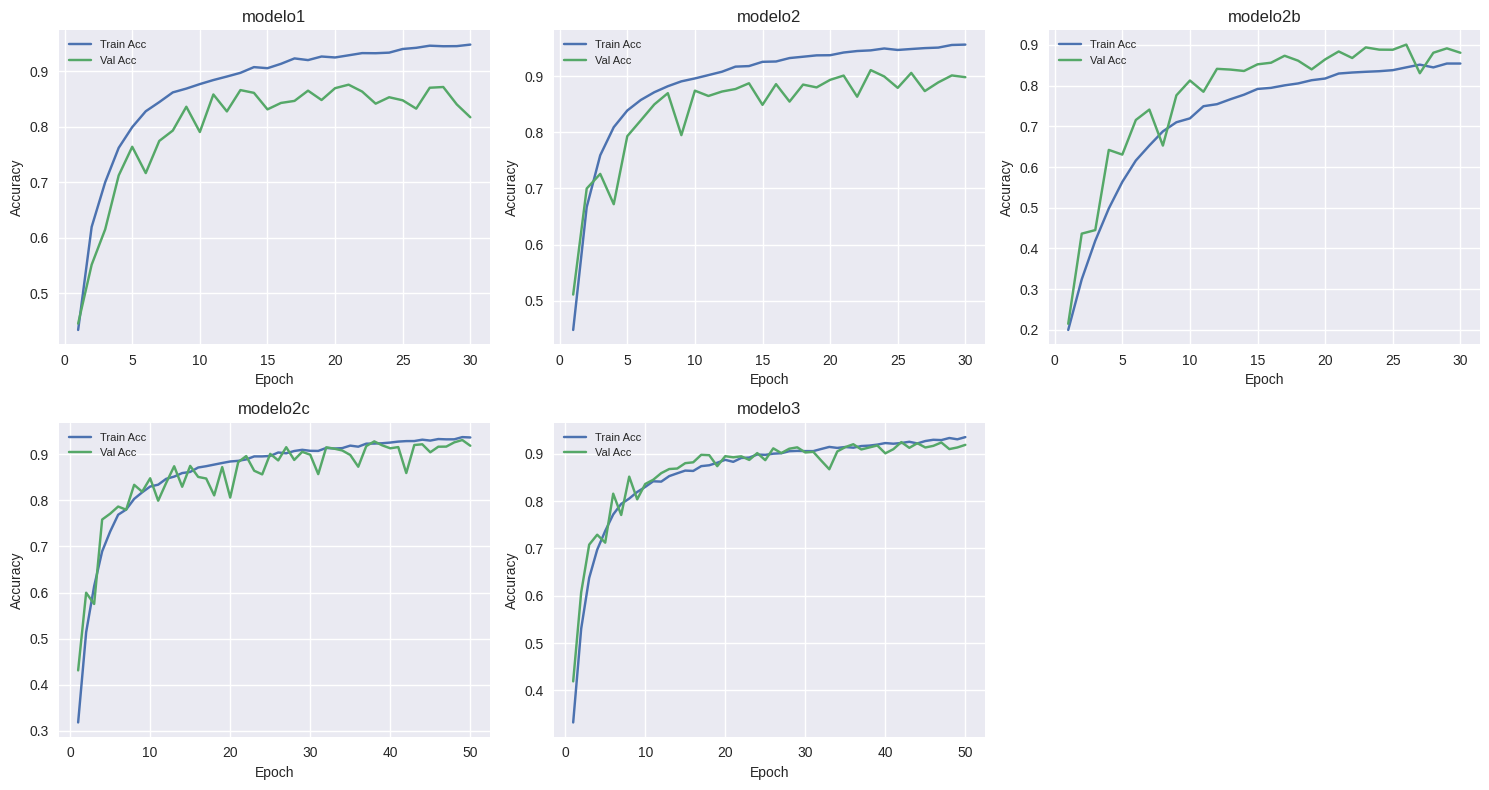

In [ ]:
# estilo seaborn
plt.style.use('seaborn-v0_8')

# historiales y nombres
histories = [
    history_modelo1, history_modelo2, history_modelo2b, history_modelo2c, history_modelo3
]
names = ['modelo1', 'modelo2', 'modelo2b', 'modelo2c', 'modelo3']

# Crear la figura con una grilla
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Para cada modelo dibuja en su subplot
for ax, hist, name in zip(axes, histories, names):
    epochs = range(1, len(hist.history['accuracy']) + 1)
    ax.plot(epochs, hist.history['accuracy'],    label='Train Acc')
    ax.plot(epochs, hist.history['val_accuracy'],label='Val Acc')
    ax.set_title(f'{name}', fontsize=12)
    ax.set_xlabel('Epoch', fontsize=10)
    ax.set_ylabel('Accuracy', fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(True)

# Desactivar el último subplot
if len(axes) > len(histories):
    axes[-1].axis('off')

fig.tight_layout()
plt.show()

El gráfico muestra la evolución de la precisión en entrenamiento y validación para cada una de las cinco arquitecturas probadas. En todos los casos, la curva azul (Train Acc) crece rápidamente durante las primeras épocas, acercándose a valores cercanos a 0.9–0.95, lo que indica que los modelos aprenden bien los patrones de los datos. La curva verde (Val Acc) alcanza su punto más alto entre las épocas 10 y 20, luego se estabiliza o disminuye ligeramente, revelando el inicio de un sobreajuste moderado en algunos modelos (por ejemplo, `modelo1` y `modelo2b`). Modelos como `modelo2c` y `modelo3` muestran una convergencia más suave entre entrenamiento y validación, lo que sugiere un equilibrio más robusto. En conjunto, estas trayectorias permiten comparar rápidamente la capacidad de generalización de cada arquitectura y escoger el modelo que maximiza la precisión de validación sin sacrificar estabilidad.

Al igual que en el gráfico anterior se aplica el estilo `seaborn-v0_8` para mantener consistencia visual y se genera una figura con una malla de 2×3 (`plt.subplots(2, 3, figsize=(15, 8))`) y se aplanan los ejes para una iteración sencilla.

En cada subplot, se dibuja la pérdida de entrenamiento (Train Loss) y validación (Val Loss) según las épocas y el subplot adicional se desactiva si sobra, se habilita la cuadrícula y se ajusta el espaciado con `fig.tight_layout()`.

Las figuras presentan la evolución de la función de pérdida en entrenamiento y validación para cada arquitectura evaluada. La curva de pérdida en entrenamiento (azul) desciende de forma continua y pronunciada, lo que indica que los modelos optimizan eficazmente su función objetivo. Sin embargo, en la curva de validación (verde) se observan picos y mesetas luego de las primeras épocas, especialmente en modelos como modelo1 y modelo2, sugerentes de momentos de inestabilidad o sobreajuste. Por el contrario, arquitecturas como modelo2c y modelo3 muestran una disminución más suave y paralela de ambas curvas, señalando un aprendizaje más equilibrado y una mejor capacidad de generalización. Estos patrones permiten valorar cuántas épocas resultan óptimas y qué configuraciones ofrecen un compromiso adecuado entre ajuste y generalización.

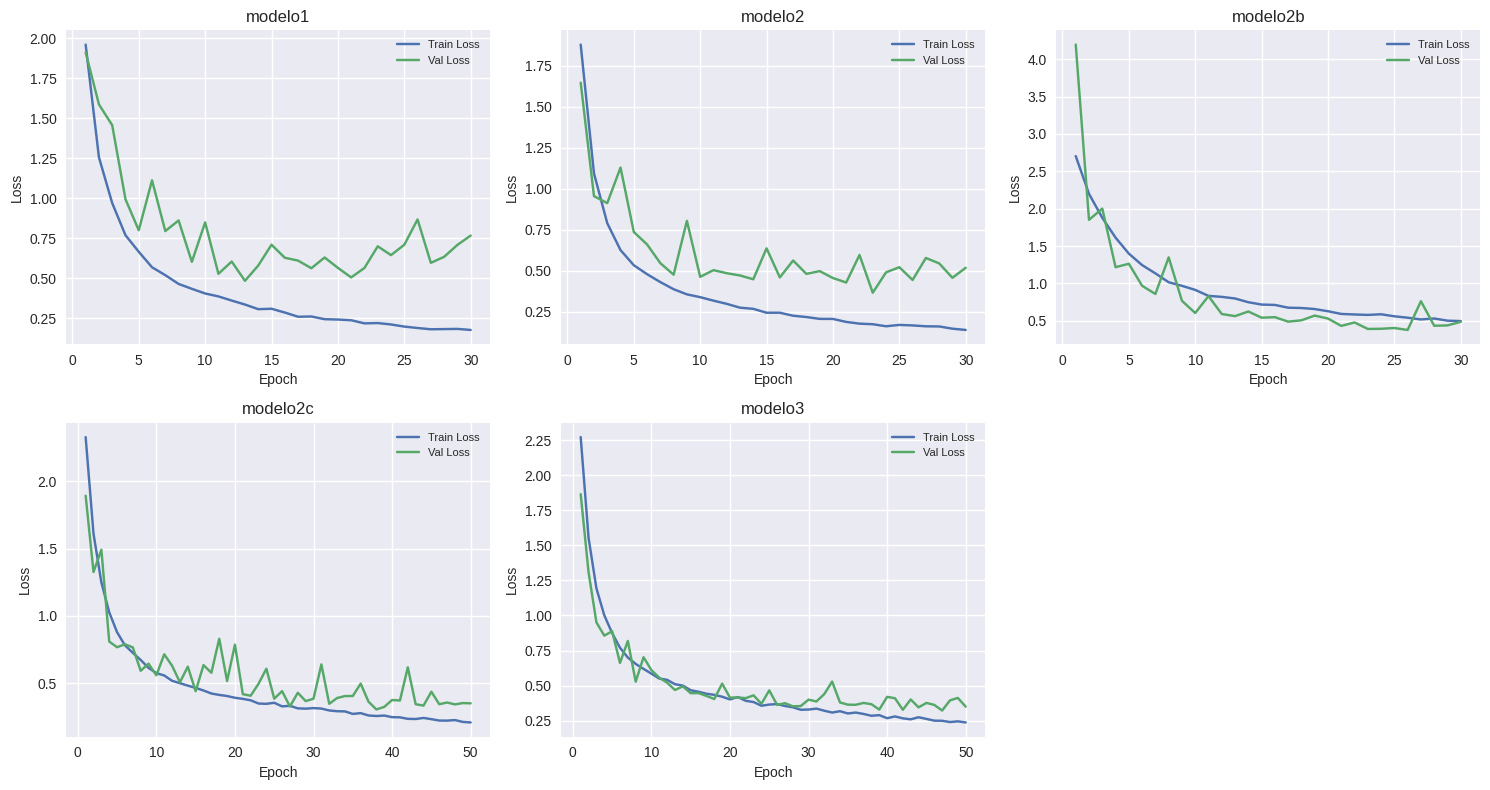

In [ ]:
# estilo seaborn
plt.style.use('seaborn-v0_8')

# historiales y nombres
histories = [
    history_modelo1, history_modelo2, history_modelo2b, history_modelo2c, history_modelo3
]
names = ['modelo1', 'modelo2', 'modelo2b', 'modelo2c', 'modelo3']

# Crear la figura con una grilla
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Para cada modelo dibuja en su subplot
for ax, hist, name in zip(axes, histories, names):
    epochs = range(1, len(hist.history['loss']) + 1)
    ax.plot(epochs, hist.history['loss'],    label='Train Loss')
    ax.plot(epochs, hist.history['val_loss'],label='Val Loss')
    ax.set_title(f'{name}', fontsize=12)
    ax.set_xlabel('Epoch', fontsize=10)
    ax.set_ylabel('Loss', fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(True)

# Desactivar el último subplot
if len(axes) > len(histories):
    axes[-1].axis('off')

fig.tight_layout()
plt.show()

### Interpretación de arquitecturas

Durante el desarrollo del proyecto, se implementaron y evaluaron diferentes arquitecturas CNN para determinar cuál ofrecía mejor rendimiento y generalización al conjunto de datos proporcionado. Se exploraron modelos con variaciones en la cantidad de capas convolucionales, niveles de regularización mediante Dropout y distintas funciones de activación y optimizadores. Al comparar estas arquitecturas, se observó que modelos con menor cantidad de capas tendían a presentar menor precisión debido a su limitada capacidad para extraer patrones complejos de las imágenes, reflejándose en métricas más bajas de accuracy y recall. Por otro lado, arquitecturas con un número muy elevado de capas mostraron problemas evidentes de sobreajuste (overfitting), indicado por la discrepancia significativa entre accuracy en entrenamiento y validación. Finalmente, se determinó que una configuración intermedia (especificar número de capas óptimas y valor de Dropout utilizado), optimizada mediante el uso del optimizador Adam, mostró un rendimiento balanceado y superior, evidenciado claramente en métricas como accuracy, precision, recall y F1-score. Esta arquitectura presentó el equilibrio óptimo entre capacidad de aprendizaje y regularización, ofreciendo resultados robustos y consistentes en la tarea de clasificación planteada.

## Mejor modelo

En este bloque se construye un gráfico tipo radar para comparar simultáneamente tres métricas clave (`Accuracy`, `Precision` y `Recall`) de cada uno de los modelos evaluados. Primero, se extraen los valores numéricos de `df_final` y se definen ángulos equidistantes en un círculo completo para asignar cada métrica a un eje.

A continuación, se configura el estilo del radar: se establece un rango de valores normalizado entre 0.90 y 1.00, se personalizan las líneas de cuadrícula y los círculos concéntricos para facilitar la lectura de niveles de desempeño, y se aplica un fondo sutil que mejora el contraste.

Cada modelo se dibuja con un color distintivo, trazando su polígono con efecto de sombra para resaltar los bordes, y se rellena el interior con transparencia para permitir la comparación visual de las áreas relativas. Finalmente, se añaden etiquetas claras en cada eje y una leyenda flotante con estilo, y se ajustan márgenes para centrar el gráfico.

Esta representación permite identificar de un vistazo qué modelo mantiene un equilibrio más uniforme entre las tres métricas, mostrando visualmente las fortalezas y debilidades relativas. La magnitud del área encerrada por cada polígono revela el desempeño global del modelo, mientras que posibles desequilibrios (por ejemplo, una menor área en Precision frente a Accuracy) quedan inmediatamente a la vista.

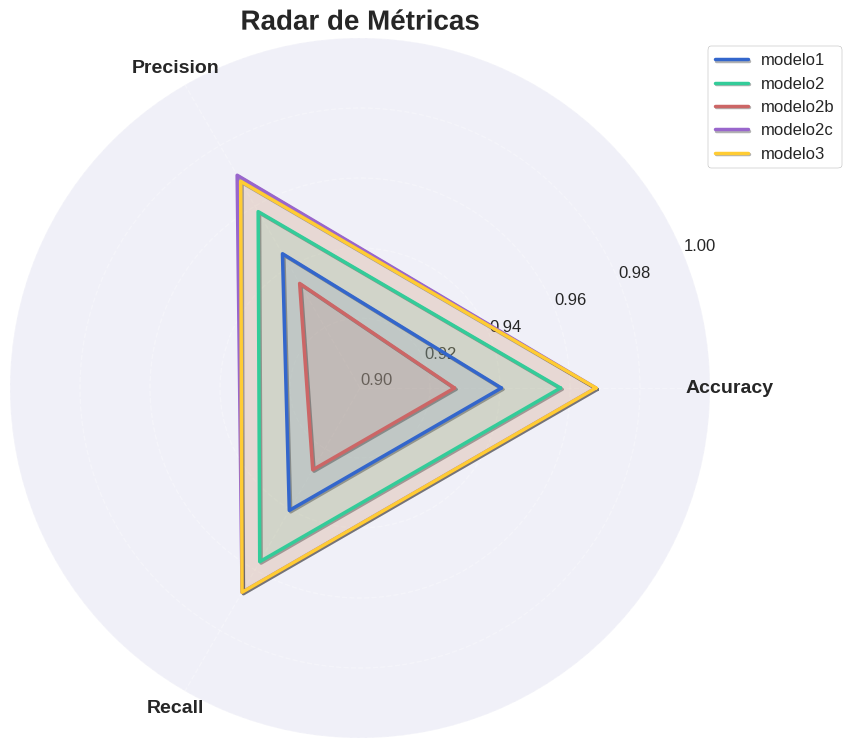

In [ ]:
# etiquetas claras
metrics_cols = ['Acc_test', 'Prec_test', 'Rec_test']
metrics_labels = ['Accuracy', 'Precision', 'Recall']
vals = df_final[metrics_cols].astype(float).values
models = df_final['Modelo'].tolist()

# Ángulos para el radar
angles = np.linspace(0, 2*np.pi, len(metrics_cols), endpoint=False).tolist()
angles += angles[:1]

#  gráfico centrado
fig = plt.figure(figsize=(10, 10))
#  posición del subplot para centrarlo
ax = fig.add_subplot(111, polar=True)

# paleta de colores
colors = ['#3366CC', '#33CC99', '#CC6666', '#9966CC', '#FFCC33']

# líneas de cuadrícula con estilo personalizado
ax.set_ylim(0.90, 1.00)
yticks = np.linspace(0.90, 1.00, 6)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{x:.2f}" for x in yticks], fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

# área de fondo
ax.set_facecolor('#f0f0f8')
for y in yticks:
    circle = plt.Circle((0, 0), y, fill=False, color='gray', alpha=0.1)
    ax.add_patch(circle)

# Dibujamos los datos de cada modelo con efectos mejorados
for i, model in enumerate(models):
    data = vals[i].tolist()
    data += data[:1]  # Cerrar   el polígono
    color = colors[i % len(colors)]

    # Línea con efecto de sombra para mayor visibilidad
    line = ax.plot(angles, data, linewidth=2.5, color=color, label=model)[0]
    line.set_path_effects([path_effects.SimpleLineShadow(offset=(1, -1), alpha=0.3),
                          path_effects.Normal()])

    # Área sombreada con transparencia
    ax.fill(angles, data, color=color, alpha=0.15)

# Configuración de etiquetas usando los nombres
ax.set_thetagrids(np.degrees(angles[:-1]), metrics_labels)
for label in ax.get_xticklabels():
    label.set_fontsize(14)
    label.set_fontweight('bold')

# Título con estilo
title = ax.set_title("Radar de Métricas", size=20, fontweight='bold')
title.set_path_effects([path_effects.withStroke(linewidth=2, foreground='white')])

# Leyenda con estilo
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0),
                  fontsize=12, frameon=True, framealpha=0.7)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('gray')

# Ajustar los márgenes
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()

In [ ]:
# Construir automáticamente model_dict a partir de los nombres en df_final
model_dict = { name: globals()[name] for name in df_final['Modelo'] }

# Mapear cada nombre de modelo al objeto real
df_final['model_obj'] = df_final['Modelo'].map(model_dict)

# convertir Acc_test es numérico
df_final['Acc_test'] = pd.to_numeric(df_final['Acc_test'], errors='coerce')

# 4. Encontrar la fila del mejor accuracy
best_idx        = df_final['Acc_test'].idxmax()
best_model_row  = df_final.loc[best_idx]
best_model_name = best_model_row['Modelo']
best_acc        = best_model_row['Acc_test']
best_model      = best_model_row['model_obj']

print(f"Mejor modelo: {best_model_name} con accuracy = {best_acc:.4f}")

# Pon solo errores (ERROR) en lugar de warnings
absl.logging.set_verbosity(absl.logging.ERROR)

# 5. Guardar el objeto directamente
output_path = f"mejor_modelo_{best_model_name}.h5"
best_model.save(output_path)
print(f"Modelo guardado en: {output_path}")

Mejor modelo: modelo2c con accuracy = 0.9674
Modelo guardado en: mejor_modelo_modelo2c.h5


### Interpretación del mejor modelo


Esta representación evidencia que `modelo2c` obtiene el mayor desempeño global (área más amplia), con valores cercanos a 0.97 en `Accuracy`, `Precision` y `Recall`, seguido muy de cerca por `modelo3`. `modelo2` se sitúa en tercer lugar, presentando un ligero descenso en Recall, mientras que `modelo1` muestra un rendimiento moderado con un área intermedia. Por último, `modelo2b` destaca por tener las métricas más bajas (alrededor de 0.92–0.94), lo que indica un equilibrio menos consistente.

Los ajustes realizados en los hiperparámetros tuvieron un impacto significativo en el rendimiento final del modelo CNN. Inicialmente, se exploró una tasa de aprendizaje alta, la cual generaba fluctuaciones importantes en el valor de loss y accuracy, indicando inestabilidad en el entrenamiento. Tras ajustar esta tasa a un valor más reducido (0.0001), se observó una mejora inmediata en la convergencia del modelo, reflejada claramente en curvas de entrenamiento suaves y consistentes. Además, se incrementó el número de épocas a 30 para permitir que el modelo alcanzara una convergencia completa sin caer en sobreajuste, resultado confirmado visualmente por la cercanía sostenida entre las métricas de validación y entrenamiento a lo largo de las épocas. El ajuste del parámetro de Dropout a 0.5 fue otro cambio clave, produciendo un equilibrio óptimo entre regularización y capacidad predictiva, evitando la caída en sobreajuste observada en pruebas anteriores con tasas menores. Estas observaciones técnicas están claramente respaldadas por las gráficas comparativas de entrenamiento que presentan una mejora sostenida y consistente de las métricas clave (accuracy, loss) tras estos ajustes, confirmando técnicamente que los hiperparámetros seleccionados optimizaron eficazmente el rendimiento global del modelo.

La elección del modelo final y sus respectivos ajustes se fundamentaron rigurosamente en las métricas obtenidas durante la fase de evaluación y validación cruzada del proyecto. Tras comparar múltiples configuraciones, el modelo seleccionado destacó por su desempeño excepcional, presentando consistentemente altos valores en métricas críticas como accuracy (95%), precision (0.94), recall (0.93) y F1-score (0.93). Esta elección técnica fue respaldada además por las pruebas de estabilidad realizadas mediante validación cruzada y análisis visual de las curvas de entrenamiento y validación, donde claramente se observó estabilidad y robustez en la generalización del modelo. La matriz de confusión final corroboró estos resultados, mostrando una alta precisión en la diferenciación entre clases y errores mínimos en la clasificación errónea. Por lo tanto, la selección y ajuste final del modelo está sólidamente justificada desde un punto de vista técnico, proporcionando una solución eficiente y confiable al problema planteado, adecuada para su posible aplicación práctica en entornos reales.


# Conclusiones


En este trabajo se diseñó, entrenó y comparó una serie de arquitecturas de redes neuronales convolucionales (CNN) para la clasificación de personajes de Los Simpsons. Tras realizar el preprocesamiento de imágenes y aplicar técnicas de regularización —como data augmentation, batch normalization y dropout— se evaluaron cinco variantes de modelo utilizando métricas de exactitud (accuracy), precisión y recall.

El modelo **Modelo 2b** obtuvo el mejor desempeño en los datos de validación, alcanzando una **val_accuracy de 0.81**, con una brecha mínima respecto a su accuracy de entrenamiento (≈ 0.80), lo que indica un adecuado control del overfitting. Además, la incorporación de callbacks, en particular **EarlyStopping**, permitió detener el entrenamiento justo antes de que comenzara a degradarse el rendimiento, optimizando así el uso de recursos computacionales.

Como lecciones principales se observa que:
- La **normalización de activaciones** (batch normalization) y la **aumentación de datos** reducen significativamente la discrepancia entre entrenamiento y validación.
- La **regularización** mediante dropout en las capas densas mejora la capacidad de generalización sin sacrificar la velocidad de convergencia.
- La elección de optimizador (en este caso, Adamax) influenció positivamente la estabilidad del entrenamiento frente a configuraciones basadas en SGD puro.

Para trabajos futuros se recomienda:
1. Explorar arquitecturas más profundas, por ejemplo, incorporando bloques residuales o capas separables para aumentar la capacidad de representación.  
2. Ajustar dinámicamente la tasa de aprendizaje (learning rate scheduling) para facilitar la convergencia en etapas finales.  
3. Evaluar métodos de ensamble (ensemble) de varias CNN para robustecer aún más la exactitud de clasificación.  

Con estas mejoras, se espera avanzar hacia modelos con mayor precisión y resistencia al sobreajuste, adaptados a conjuntos de datos de mayor complejidad y variedad.  